In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('price_optimsation_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [153]:
# Checking a random row value to see the nature of values we're dealing with
df.iloc[43]

product_id                         garden7
product_category_name         garden_tools
month_year                      01-05-2017
qty                                      1
total_price                           59.9
freight_price                        13.44
unit_price                            59.9
product_name_lenght                     57
product_description_lenght             339
product_photos_qty                       2
product_weight_g                      1800
product_score                          4.2
customers                               34
weekday                                 23
weekend                                  8
holiday                                  1
month                                    5
year                                  2017
s                                 8.756806
volume                               32560
comp_1                                59.9
ps1                                    4.1
fp1                                19.7325
comp_2     

In [154]:
# Checking for null values
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

Since there are no null values to handle, we do a quick Summary statistical analysis of all features

In [155]:
# Summary statistics of categorical variables
df.describe(include='object').T

,count,unique,top,freq
product_id,676,52,health5,20
product_category_name,676,9,garden_tools,160
month_year,676,20,01-03-2018,50


In [156]:
# Summary statistics of continuous variables
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


Since we have Month and Year columns already available along with quantity and unit price for each entry, we drop the columns `month_year`, `total_price`

In [157]:
# Converting Month Year to datetime object
df['month_year'] = pd.to_datetime(df['month_year'], format="%d-%m-%Y")
df['year'] = df['month_year'].dt.year
df['month'] = df['month_year'].dt.month

# Removing the columns total_price and month_year
df.drop(['month_year', 'total_price'], axis=1, inplace=True)

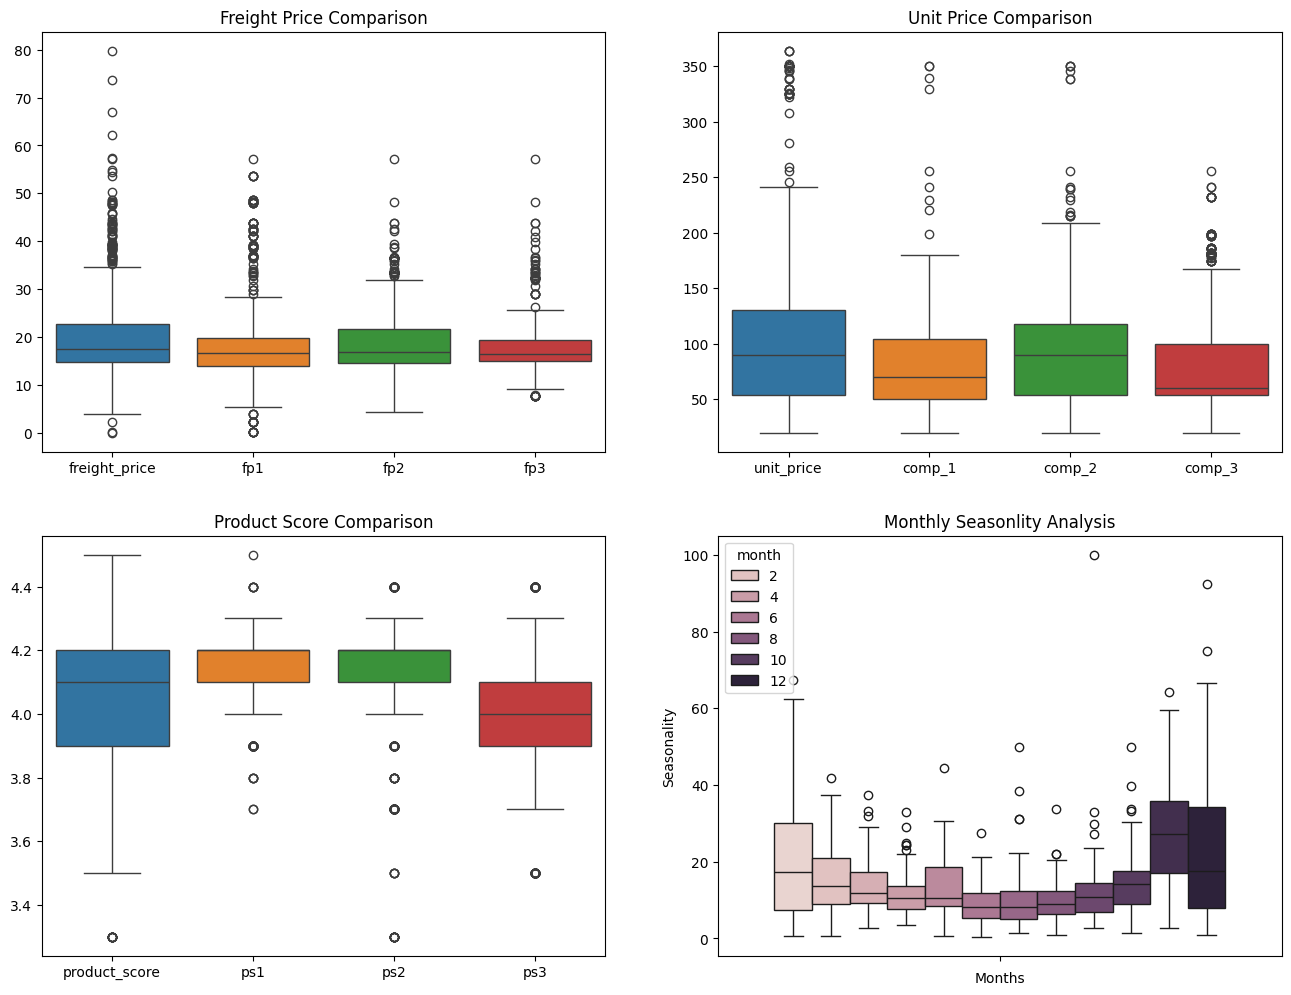

In [158]:
# Comparing Freight prices, Unit prices and Product ratings amongst competitors
fig, ax = plt.subplots(2,2, figsize=(16, 12))
sns.boxplot(data=df[['freight_price', 'fp1', 'fp2', 'fp3']], ax=ax[0, 0])
ax[0, 0].set_title("Freight Price Comparison")
sns.boxplot(data=df[['unit_price', 'comp_1', 'comp_2', 'comp_3']], ax=ax[0, 1])
ax[0, 1].set_title("Unit Price Comparison")
sns.boxplot(data=df[['product_score', 'ps1', 'ps2', 'ps3']], ax=ax[1, 0])
ax[1, 0].set_title("Product Score Comparison")
sns.boxplot(data=df[['month', 's']], y="s", hue="month", ax=ax[1, 1])
ax[1, 1].set_title("Monthly Seasonlity Analysis")
ax[1, 1].set_xlabel("Months")
ax[1, 1].set_ylabel("Seasonality")
plt.show()

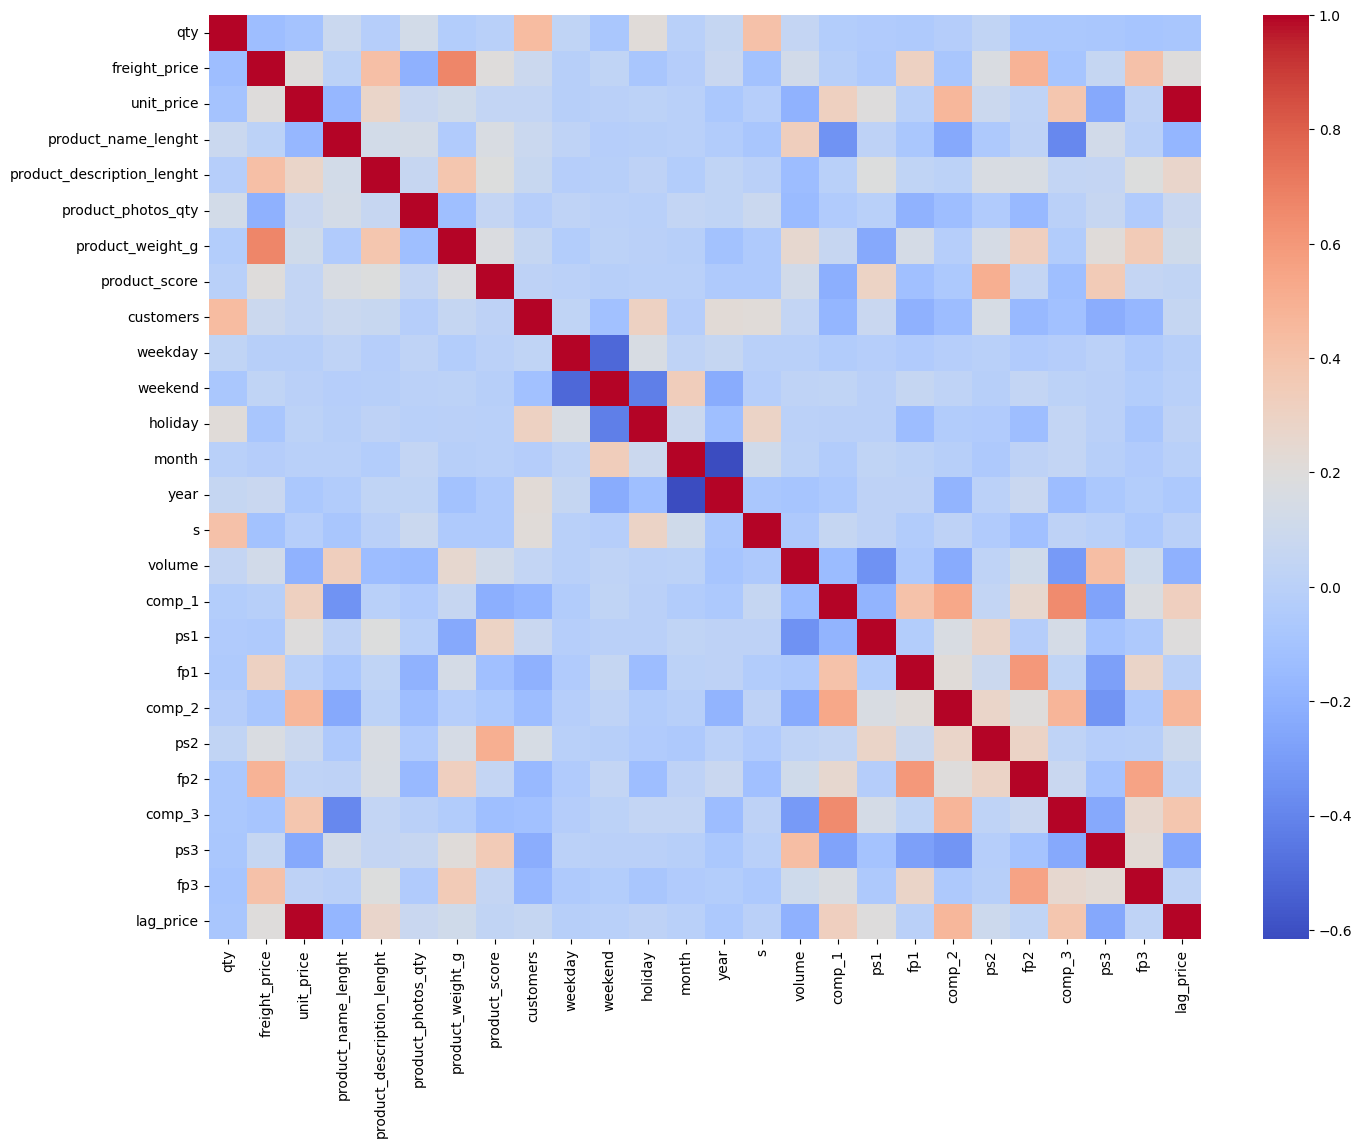

In [159]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.show()

Most of the blue patches indicate no strong correlation between the categories and the ones which show strong +ve correlation do not hold much significance as they are calculated using those attributes. 

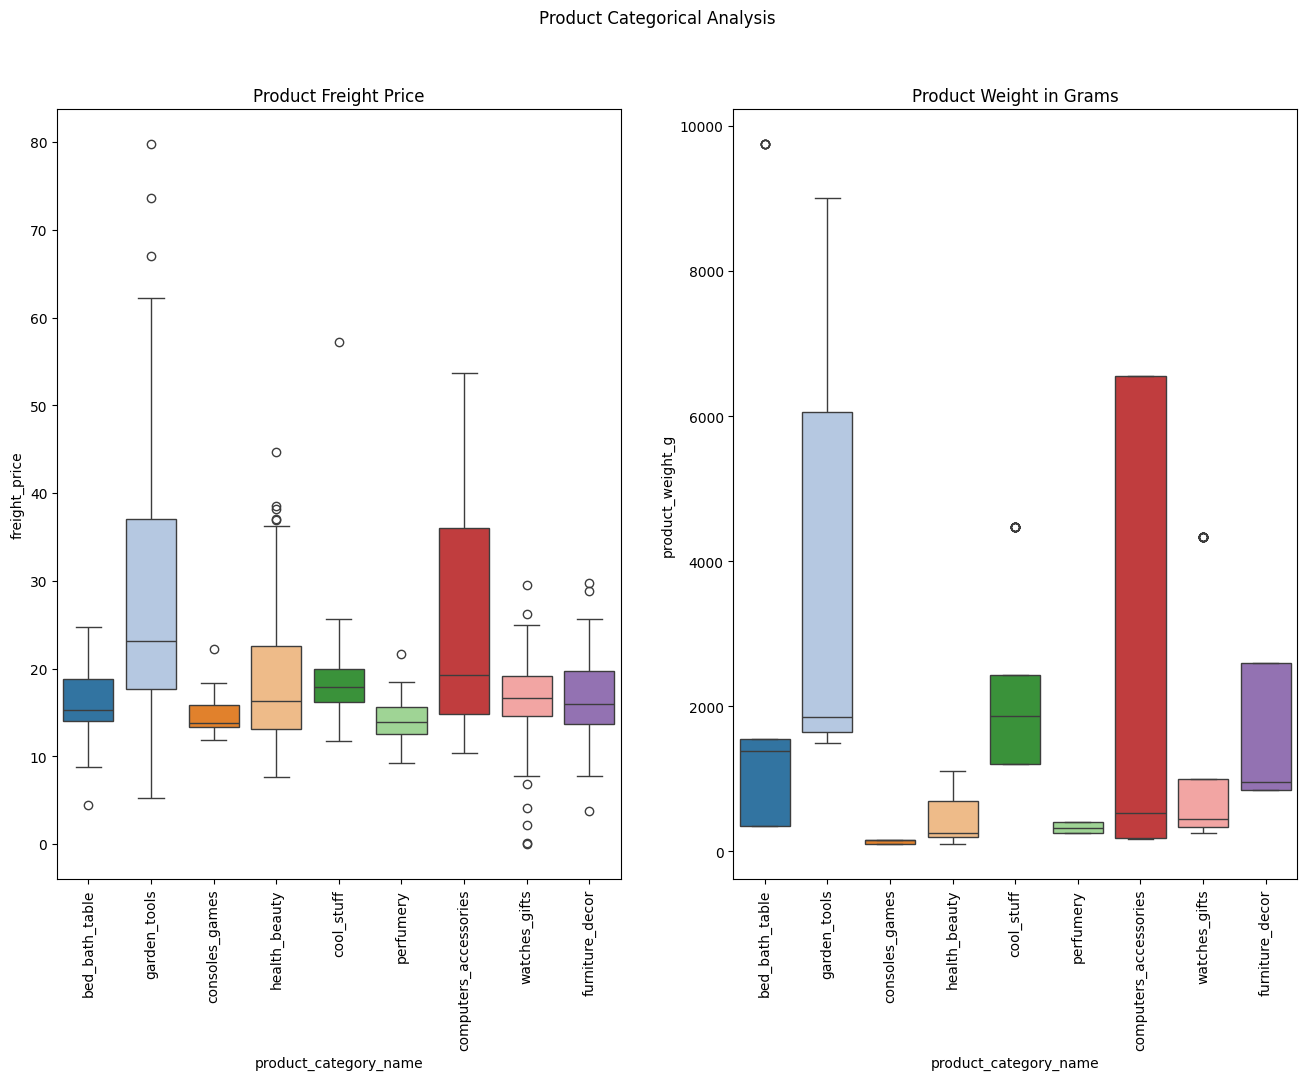

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
sns.boxplot(data=df, y="freight_price",
            x="product_category_name", hue="product_category_name", ax=ax[0], palette="tab20")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title("Product Freight Price")
sns.boxplot(data=df, y="product_weight_g",
            x="product_category_name", hue="product_category_name", ax=ax[1], palette="tab20")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title("Product Weight in Grams")
fig.suptitle("Product Categorical Analysis")
plt.show()

## Feature Engineering
---
Breaking the feature engineering into 2 parts:
1) *Revenue Features*
   * Revenue
   * Profit
   * Profit Margin
2) *Time-Related Features*
   * Weekend Ratio
   * Holiday Ratio
   * Season:
     * **Winter**: Dec, Jan, Feb
     * **Spring**: Mar, Apr, May
     * **Summer**: Jun, Jul, Aug
     * **Fall**: Sep, Oct, Nov

In [161]:
# Revenue Features
df["revenue"] = df["unit_price"] * df["qty"]
df["profit"] = df["revenue"]-(df["qty"]*df["freight_price"])
df["profit_margin"] = df["profit"]/df["revenue"]

# Time-related features
df['weekend_ratio'] = df['weekend'] / (df['weekday'] + df['weekend'])
df['holiday_ratio'] = df['holiday'] / (df['weekday'] + df['weekend'])
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

In [162]:
# Initial Analysis on new features
df[['weekend_ratio', 'holiday_ratio', "revenue", "profit", "profit_margin"]].describe()

,weekend_ratio,holiday_ratio,revenue,profit,profit_margin
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.284592,0.049290,1422.220453,1143.488456,0.735153
std,0.022485,0.031392,1699.375345,1507.291278,0.161945
min,0.258065,0.000000,19.900000,-16.740000,-0.155288
25%,0.258065,0.032258,333.700000,212.280000,0.656303
50%,0.290323,0.033333,807.890000,610.705000,0.764691
75%,0.300000,0.064516,1887.322500,1528.300000,0.851525
max,0.333333,0.133333,12095.000000,11821.467668,1.000000


# Seasonal Analysis

In [163]:
# Seasonal analysis on quantity:
df.groupby('season')['qty'].sum()

season
Fall      2051
Spring    2926
Summer    2365
Winter    2457
Name: qty, dtype: int64

Most quantity appears to be purchased during Spring

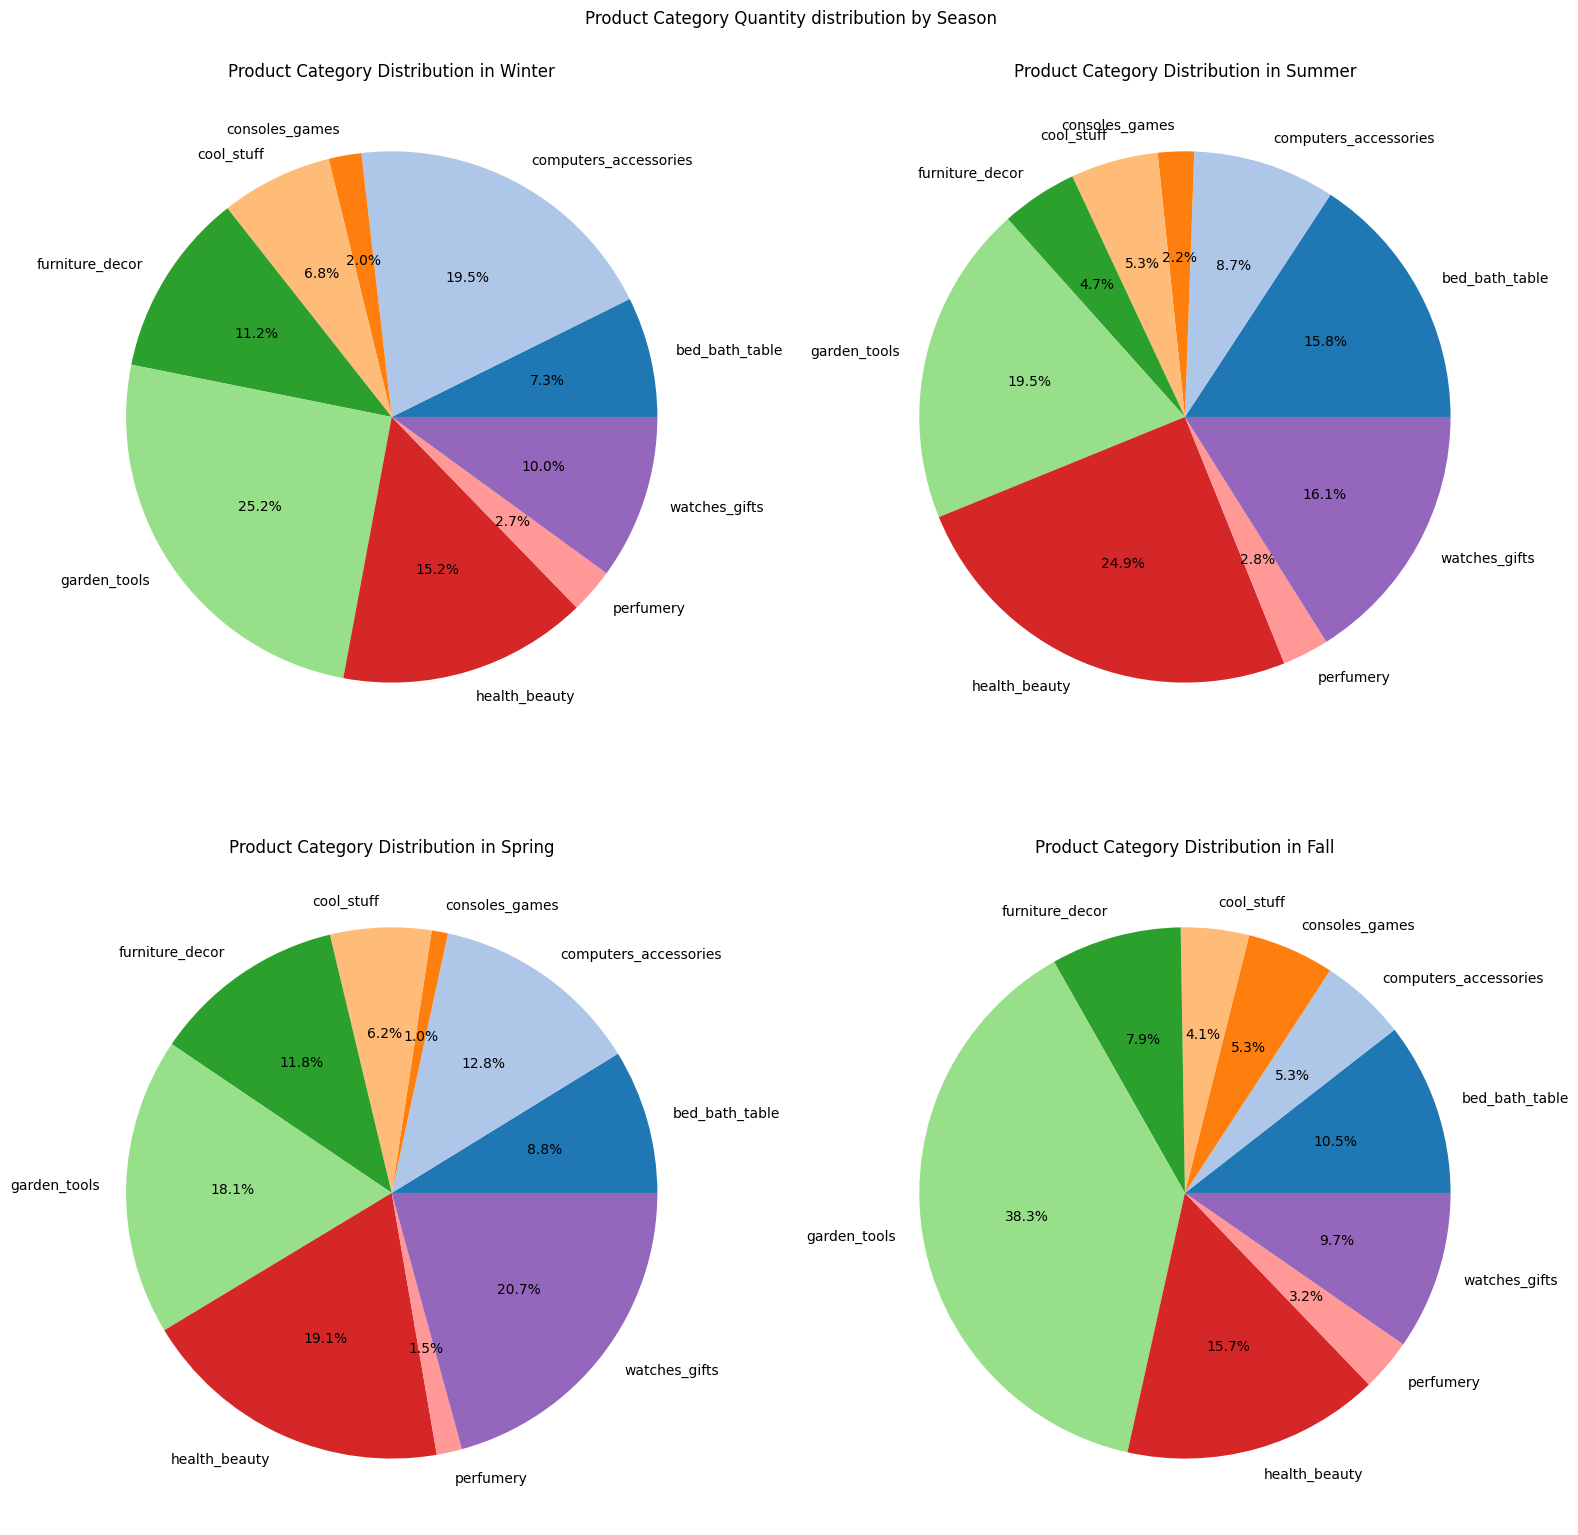

In [164]:
# Checking Seasonal Trends across various product categories
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax[0,0].pie(
    df[df.season == 'Winter'].groupby('product_category_name')['qty'].sum(),
    labels=df[df.season == 'Winter'].groupby('product_category_name')[
        'qty'].sum().index,
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors
)
ax[0,0].set_title('Product Category Distribution in Winter')

ax[0, 1].pie(
    df[df.season == 'Summer'].groupby('product_category_name')['qty'].sum(),
    labels=df[df.season == 'Summer'].groupby('product_category_name')[
        'qty'].sum().index,
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors
)
ax[0, 1].set_title('Product Category Distribution in Summer')

ax[1, 0].pie(
    df[df.season == 'Spring'].groupby('product_category_name')['qty'].sum(),
    labels=df[df.season == 'Spring'].groupby('product_category_name')[
        'qty'].sum().index,
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors
)
ax[1, 0].set_title('Product Category Distribution in Spring')

ax[1, 1].pie(
    df[df.season == 'Fall'].groupby('product_category_name')['qty'].sum(),
    labels=df[df.season == 'Fall'].groupby('product_category_name')[
        'qty'].sum().index,
    autopct='%1.1f%%',
    colors=plt.cm.tab20.colors
)
ax[1, 1].set_title('Product Category Distribution in Fall')
fig.suptitle("Product Category Quantity distribution by Season")
plt.tight_layout()
plt.show()

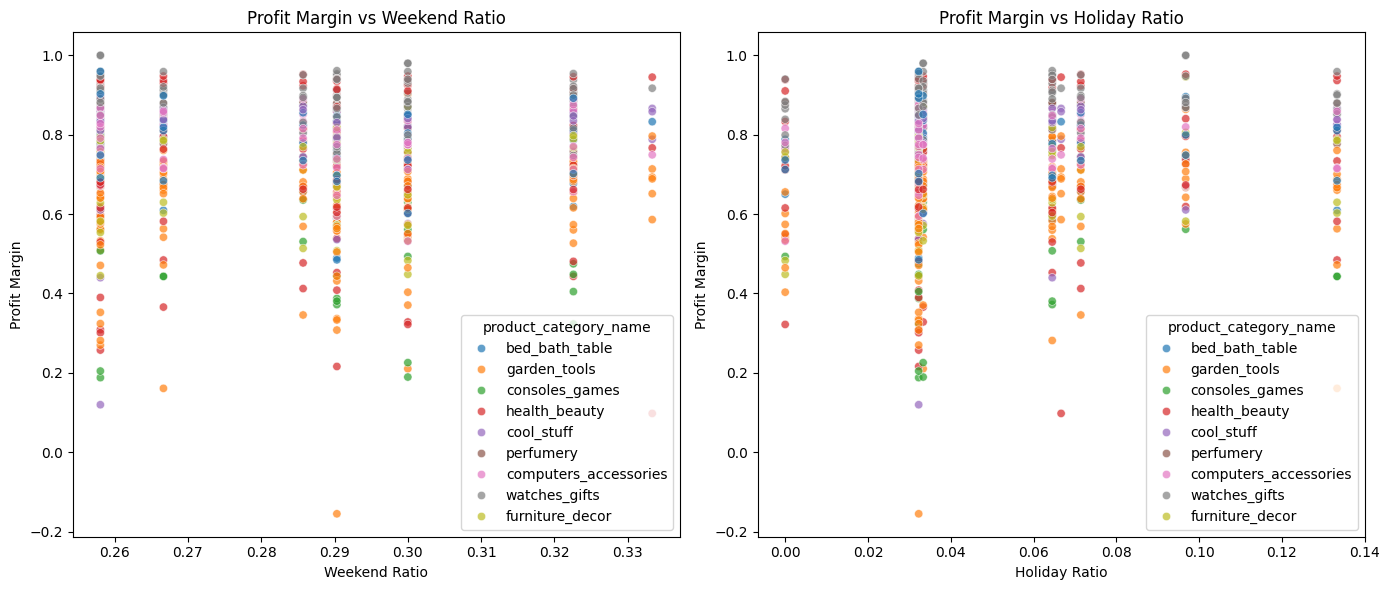

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot for weekend_ratio
sns.scatterplot(
    data=df,
    x="weekend_ratio",
    y="profit_margin",
    hue="product_category_name",
    palette="tab10",
    ax=ax[0],
    alpha=0.7
)
ax[0].set_title("Profit Margin vs Weekend Ratio")
ax[0].set_xlabel("Weekend Ratio")
ax[0].set_ylabel("Profit Margin")

# Scatterplot for holiday_ratio
sns.scatterplot(
    data=df,
    x="holiday_ratio",
    y="profit_margin",
    hue="product_category_name",
    palette="tab10",
    ax=ax[1],
    alpha=0.7
)
ax[1].set_title("Profit Margin vs Holiday Ratio")
ax[1].set_xlabel("Holiday Ratio")
ax[1].set_ylabel("Profit Margin")

plt.tight_layout()
plt.show()

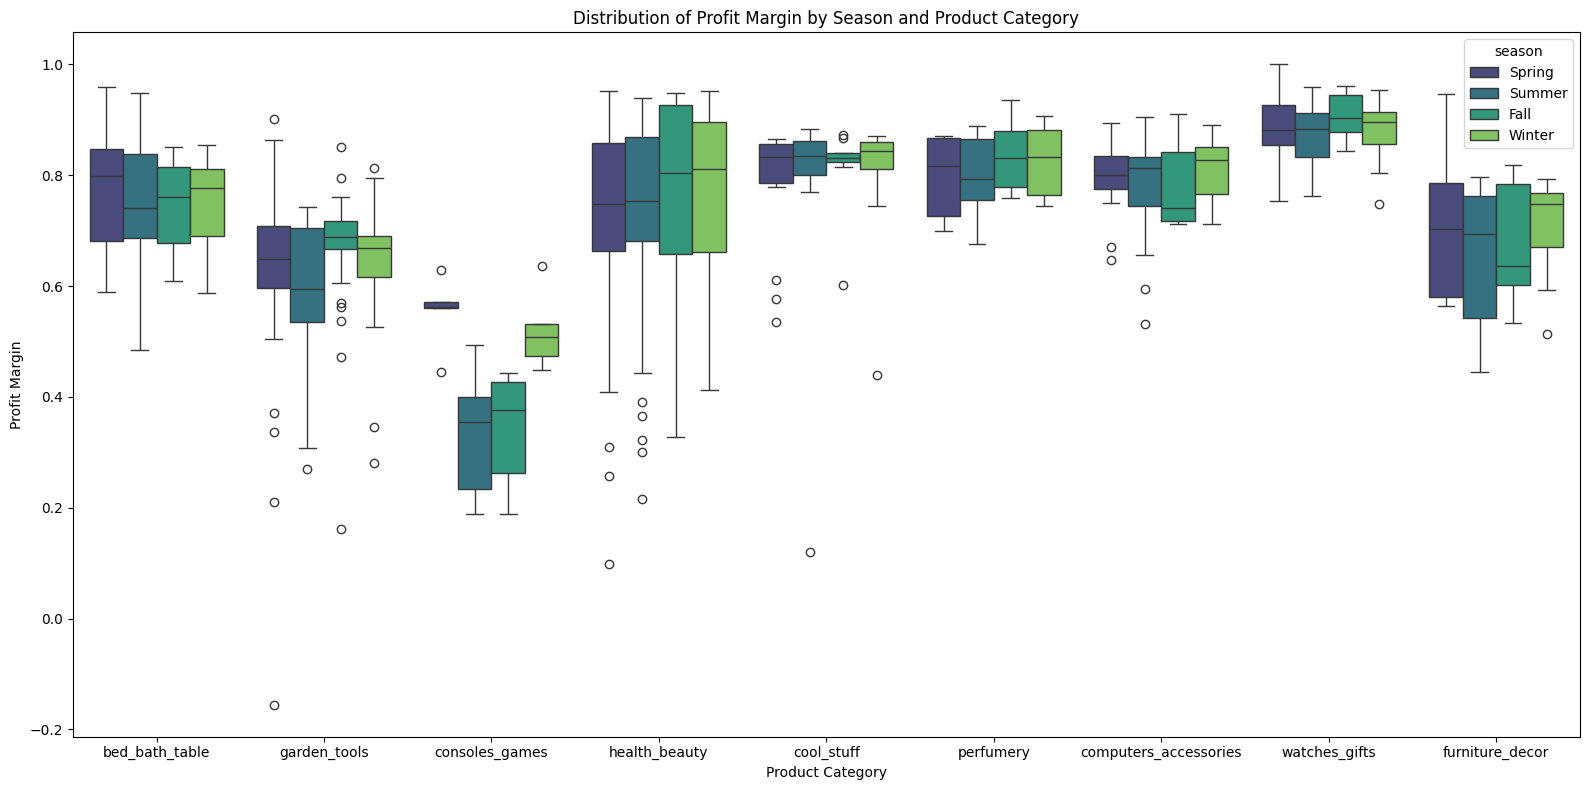

In [166]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df,
    x="product_category_name",
    y="profit_margin",
    hue="season",
    palette="viridis"
)
plt.title("Distribution of Profit Margin by Season and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.show()

## Hypothesis Testing:
---
**Goal:** Analyze if freight_price or unit_price varies significantly across seasons.

### Test Design:
* We will use ANOVA (Analysis of Variance) to compare means of freight_price and unit_price across different seasons.
* Null Hypothesis (H0): There is no significant difference in the mean of freight_price or unit_price across groups.
* Alternative Hypothesis (H1): There is a significant difference.
* We'll keep a significance value of 5%

In [167]:
from scipy.stats import f_oneway

# Grouping by seasons
seasons = df['season'].unique()

# Group freight_price by season
freight_by_season = [df[df['season'] == season]
                     ['freight_price'] for season in seasons]

# Perform ANOVA test for freight_price
f_stat, f_pval = f_oneway(*freight_by_season)
if f_pval < 0.05:
    print("There is a statistically significant difference in the Freight price across the seasons.")
else:
    print("There is no statistically significant difference in the Freight price across the seasons.")

# Group unit_price by season
unit_by_season = [df[df['season'] == season]['unit_price']
                  for season in seasons]

# Perform ANOVA test for unit_price
f_stat, f_pval = f_oneway(*unit_by_season)
if f_pval < 0.05:
    print("There is a statistically significant difference in the unit price across the seasons.")
else:
    print("There is no statistically significant difference in the unit price across the seasons.")

There is no statistically significant difference in the Freight price across the seasons.
There is no statistically significant difference in the unit price across the seasons.


> Both tests suggest that there is no significant variation in either freight_price or unit_price across different seasons.
> Since the p-values are greater than 0.05, we conclude that any differences observed in the mean prices across seasons are likely due to random variation rather than any meaningful seasonal pattern.

### Demand elasticity for optimal pricing
---
**Regression Design:**
* Response Variable: demand elasticity (which can be proxied by qty or percentage change in demand).
* Predictors: weekend_ratio, holiday_ratio, and unit_price.


In [168]:
import statsmodels.api as sm
df['demand_pct_change'] = df['qty'].pct_change().fillna(
    0)

# Define predictors and target
X = df[['weekend_ratio', 'holiday_ratio', 'unit_price']]
y = df['demand_pct_change']

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      demand_pct_change   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.998
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0301
Time:                        23:10:43   Log-Likelihood:                -1865.7
No. Observations:                 676   AIC:                             3739.
Df Residuals:                     672   BIC:                             3757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3347      2.122      1.572

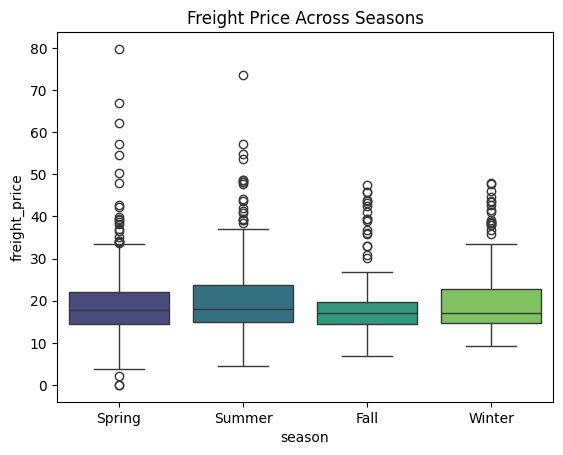

In [169]:
sns.boxplot(data=df, x="season", y="freight_price", hue="season", palette="viridis")
plt.title("Freight Price Across Seasons")
plt.show()

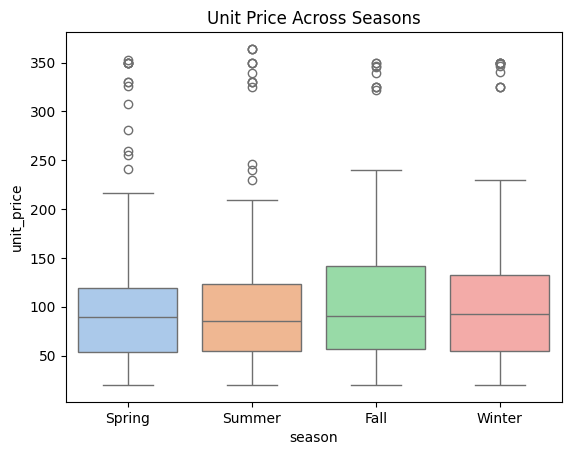

In [170]:
sns.boxplot(data=df, x="season", y="unit_price", hue="season", palette="pastel")
plt.title("Unit Price Across Seasons")
plt.show()

# Demand Elasticity Modelling
---
Demand elasticity quantifies how sensitive the demand for a product is to changes in its price. It is calculated using the formula:


Elasticity = (Percentage Change in Quantity)/(Percentage Change in Price)

* If Elasticity < -1: Demand is elastic, meaning consumers are highly responsive to price changes.
* If Elasticity = -1: Demand is unitary elastic, indicating that revenue remains unchanged with price changes.
* If -1 < Elasticity < 0: Demand is inelastic, meaning consumers are less responsive to price changes.

In [171]:
df['pct_change_qty'] = df['qty'].pct_change()
df['pct_change_price'] = df['unit_price'].pct_change()
df['elasticity'] = df['pct_change_qty'] / df['pct_change_price']

# Calculate percentage changes in quantity and price
df['pct_change_qty'] = df['qty'].pct_change()
df['pct_change_price'] = df['unit_price'].pct_change()

# Calculate elasticity
df['elasticity'] = df['pct_change_qty'] / df['pct_change_price']

# Adjust prices dynamically based on elasticity


def dynamic_pricing(row):
    if row['elasticity'] < -1:  # Elastic demand
        return row['unit_price'] * 0.9  # Reduce price by 10%
    elif row['elasticity'] > -1:  # Inelastic demand
        return row['unit_price'] * 1.1  # Increase price by 10%
    else:
        return row['unit_price']  # Keep price unchanged


df['dynamic_price'] = df.apply(dynamic_pricing, axis=1)

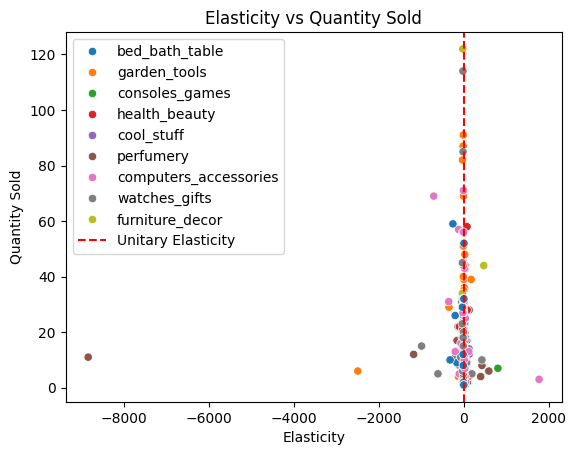

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Elasticity vs Quantity
sns.scatterplot(data=df, x='elasticity', y='qty',
                hue='product_category_name', palette='tab10')
plt.title("Elasticity vs Quantity Sold")
plt.xlabel("Elasticity")
plt.ylabel("Quantity Sold")
plt.axvline(x=-1, color='red', linestyle='--', label='Unitary Elasticity')
plt.legend()
plt.show()

# Conclusion:
---
### Dynamic Pricing for Revenue Maximization:
* Revenue is maximized when prices are set based on the unitary elasticity point (Elasticity = -1).
* If demand is elastic (Elasticity < -1), lowering prices might increase revenue due to higher sales volume.
* If demand is inelastic (-1 < Elasticity < 0), increasing prices can raise revenue because quantity sold decreases at a slower rate than the price increase.
### Profit Optimization:
This Combines elasticity with cost data to identify the optimal price point that maximizes profit (not just revenue).


> In short, by estimating demand elasticity:
> 1.	We can adjust prices dynamically to maximize revenue or profit.
> 2.	Monitor how products in different categories respond to price changes.
> 3.	Incorporate elasticity-based insights into pricing strategies for optimal outcomes.